In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Loading data

In [2]:
ETF_names = ['EEM', 'EFA', 'EMB', 'EWA', 'EWG', 'EWH', 'IEF', 'TLT', 'TIP']
ETF = {}
for i in ETF_names:
    ETF[i] = web.DataReader(i,
                            'yahoo',
                           datetime.datetime(2001, 1, 1))

In [3]:
index_keys = {'Russell_3000': 'RU3000TR', 'UST 2': 'DGS2', 'UST 5': 'DGS5', 'UST 10': 'DGS10',\
             'BofA': 'BAMLHYH0A0HYM2TRIV', 'EUR/USD': 'DEXUSEU', 'USD/JPY': 'EXJPUS', 'oil WTI': 'DCOILWTICO',\
             'GLD': 'GOLDAMGBD228NLBM', 'R3000_value': 'RU3000VTR', 'R3000_growth': 'RU3000GTR',\
             'LIBOR': 'USD3MTD156N', 'CCP(v1)': 'BAA', 'CCP(v2)': 'AAA', 'CCP(v3)': 'BAMLH0A0HYM2EY',\
             'UST 30': 'DGS30', 'Fed rate': 'FEDFUNDS', 'Mat Prem(v1)': 'T10Y2Y', 'Mat Prem(v2)': 'T10Y3M',\
             'Cred Prem(v1)': 'BAA10Y', 'Cred Prem(v2)': 'AAA10Y', 'Cred Prem(v3)': 'BAMLH0A0HYM2',\
             'Infl Prem(v1)': 'T5YIE', 'Infl Prem(v2)': 'T10YIE', 'Infl Prem(v3)': 'T5YIFR',\
             'Liquid Prem': 'TEDRATE', 'VIX': 'VIXCLS', 'Trade W U.S.D I': 'DTWEXM',\
             'Econ Pol Uncertain': 'USEPUINDXD', 'CFSI': 'CFSI'}

index_resourse = {'Russell_3000': 'fred', 'UST 2': 'fred', 'UST 5': 'fred', 'UST 10': 'fred', 'BofA': 'fred',\
                 'EUR/USD': 'fred', 'USD/JPY': 'fred', 'oil WTI': 'fred', 'GLD': 'fred', 'R3000_value': 'fred',\
                 'R3000_growth': 'fred', 'LIBOR': 'fred', 'CCP(v1)': 'fred', 'CCP(v2)': 'fred', 'CCP(v3)': 'fred',\
                 'UST 30': 'fred', 'Fed rate': 'fred', 'Mat Prem(v1)': 'fred', 'Mat Prem(v2)': 'fred',\
                 'Cred Prem(v1)': 'fred', 'Cred Prem(v2)': 'fred', 'Cred Prem(v3)': 'fred', 'Infl Prem(v1)': 'fred',\
                 'Infl Prem(v2)': 'fred', 'Infl Prem(v3)': 'fred', 'Liquid Prem': 'fred', 'VIX': 'fred',\
                 'Trade W U.S.D I': 'fred', 'Econ Pol Uncertain': 'fred', 'CFSI': 'fred'}

indexes = {}

for i in index_keys:
    indexes[i] = web.DataReader(index_keys[i],
                               index_resourse[i],
                               datetime.datetime(2001, 1, 1))

In [4]:
index_names = ['Russell_3000', 'UST 2', 'UST 5', 'UST 10', 'BofA', 'EUR/USD', 'USD/JPY', 'oil WTI', 'GLD',\
               'R3000_value', 'R3000_growth', 'LIBOR', 'CCP(v1)', 'CCP(v2)', 'CCP(v3)', 'UST 30', 'Fed rate',\
               'Mat Prem(v1)', 'Mat Prem(v2)', 'Cred Prem(v1)', 'Cred Prem(v2)', 'Cred Prem(v3)', 'Infl Prem(v1)',\
               'Infl Prem(v2)', 'Infl Prem(v3)', 'Liquid Prem', 'VIX', 'Trade W U.S.D I', 'Econ Pol Uncertain', 'CFSI']

In [5]:
for i in  ETF:
    ETF[i]['Pct'] = ETF[i]['Adj Close'].pct_change() * 100.0
for i in indexes:
    indexes[i]['Pct'] = indexes[i][index_keys[i]].pct_change() * 100.0

# Rolling Correlation

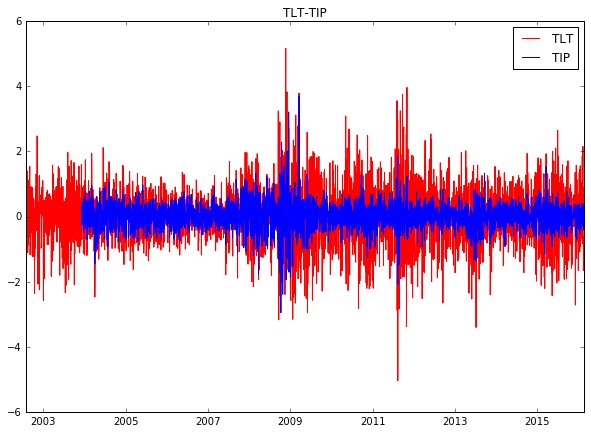

In [6]:
#TLT-TIP
plt.figure(figsize=(10,7))
plt.title('TLT-TIP')
plt.plot(ETF['TLT']['Pct'], c='red', label='TLT')
plt.plot(ETF['TIP']['Pct'], c='blue', label='TIP')
plt.legend(loc='best')

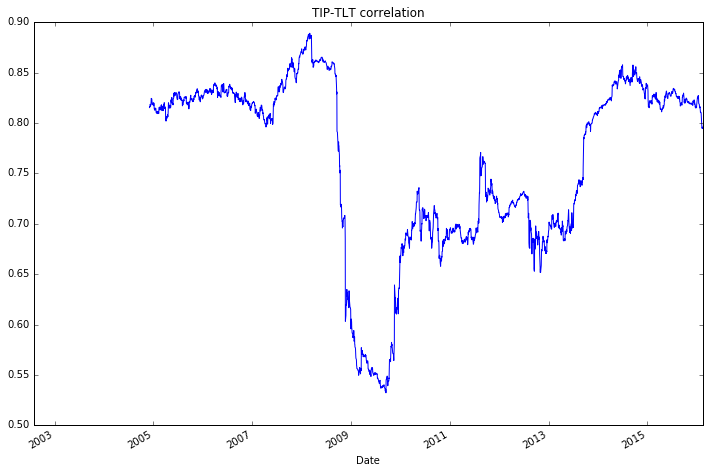

In [7]:
plt.figure(figsize=(12,8))
plt.title('TIP-TLT correlation')
pd.rolling_corr(ETF['TLT']['Pct'], ETF['TIP']['Pct'], window=250).plot()

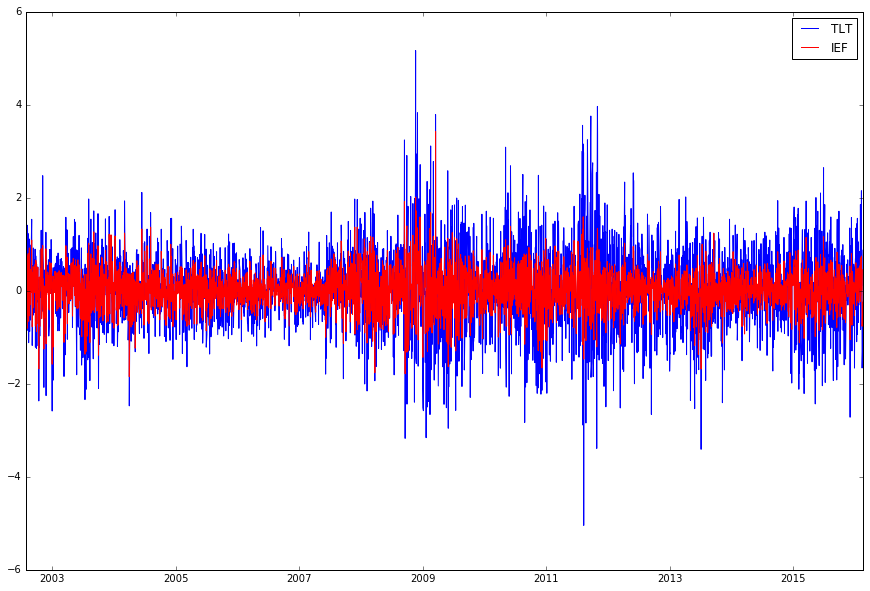

In [8]:
#IEF-TLT
plt.figure(figsize=(15,10))
plt.plot(ETF['TLT']['Pct'], c='blue', label='TLT')
plt.plot(ETF['IEF']['Pct'], c='red', label='IEF')
plt.legend(loc='best')

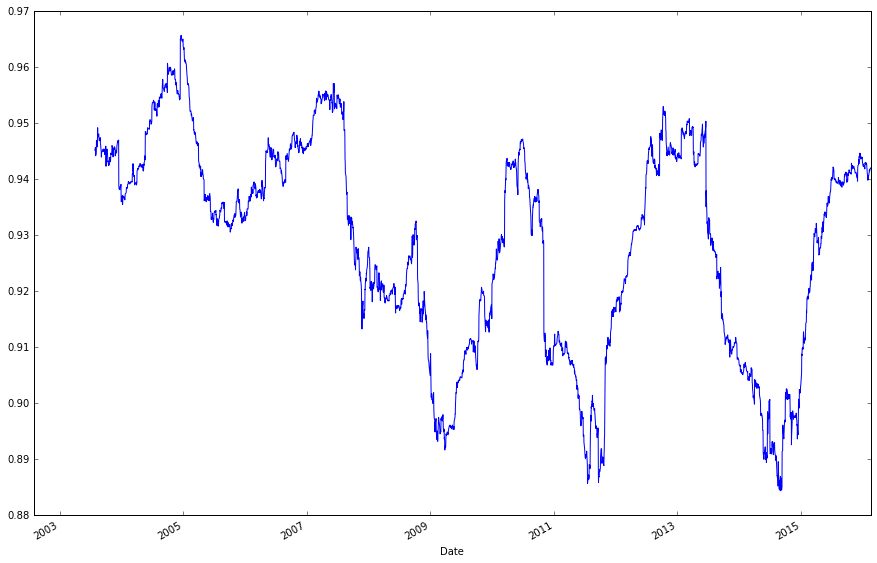

In [9]:
plt.figure(figsize=(15,10))
pd.rolling_corr(ETF['IEF']['Pct'], ETF['TLT']['Pct'], window=250).plot()

In [6]:
all_indexes = pd.DataFrame()
for i in index_names:
    all_indexes[i] = indexes[i]['Pct']
all_ETFs = pd.DataFrame()
for i in ETF_names:
    all_ETFs[i] = ETF[i]['Pct']

# Betas

In [27]:
from sklearn import linear_model
Betas = pd.DataFrame(columns=[index_names], index = ETF_names)
for i in ETF_names:
    for j in index_names:
        result = pd.concat([all_indexes[[j]], all_ETFs[[i]]], axis=1, join='inner').replace([np.inf, -np.inf], np.nan).dropna(axis=0)
        clf = linear_model.LinearRegression()
        clf.fit(result[[j]], result[[i]])
        Betas[j][i] = clf.coef_[0, 0]
Betas

,Russell_3000,UST 2,UST 5,UST 10,BofA,EUR/USD,USD/JPY,oil WTI,GLD,R3000_value,...,Cred Prem(v2),Cred Prem(v3),Infl Prem(v1),Infl Prem(v2),Infl Prem(v3),Liquid Prem,VIX,Trade W U.S.D I,Econ Pol Uncertain,CFSI
EEM,1.38293,0.0911253,0.177511,0.304811,1.67128,0.620897,0.237104,0.251071,0.103701,1.29014,...,-0.0914094,-0.422062,0.00432313,0.0336051,0.0909746,-0.0121353,-0.18016,-0.922647,0.000343406,-3.07062e-05
EFA,1.05524,0.0674275,0.137014,0.23364,1.4685,0.76013,0.167089,0.18972,0.0630065,0.988629,...,-0.0551854,-0.328595,0.00527503,0.0281673,0.0724539,-0.00853159,-0.140737,-1.0442,0.000383483,0.000119417
EMB,0.122186,-0.00288037,-0.00525927,0.00167795,0.736255,0.185361,0.0358226,0.0453593,0.0245132,0.115194,...,-1.94999e-05,-0.126303,-0.000148106,0.00477615,-0.00223975,-0.00523044,-0.024766,-0.317355,2.33885e-05,0.000234669
EWA,1.17706,0.0721485,0.147205,0.255634,1.89083,0.910548,0.150025,0.260611,0.146563,1.10392,...,-0.0775365,-0.398167,0.00939707,0.031328,0.0950635,-0.014145,-0.157288,-1.37025,8.37997e-05,0.000588775
EWG,1.16035,0.0750713,0.162436,0.280987,1.66728,1.00624,0.195189,0.206212,0.0868761,1.08195,...,-0.0531612,-0.380296,0.00486756,0.032725,0.0791318,-0.00714259,-0.153075,-1.30617,0.000477235,0.00029334
EWH,1.04947,0.0775139,0.141345,0.238153,1.23859,0.288555,0.181359,0.159949,0.0745177,0.976764,...,-0.0955852,-0.324954,0.0027564,0.0185175,0.0649519,-0.0102263,-0.135798,-0.435981,0.000229657,0.000386154
IEF,-0.138428,-0.0614948,-0.121051,-0.198055,-0.0693034,0.014741,-0.0408551,-0.0329687,-0.00485781,-0.128471,...,0.0715827,0.169397,-0.00257103,-0.00659887,-0.0309608,0.00883497,0.0199786,-0.0241638,-8.28677e-05,3.02299e-05
TLT,-0.295358,-0.10242,-0.220625,-0.394624,-0.272089,-0.0466619,-0.0835863,-0.0843849,-0.0135234,-0.274626,...,0.0451091,0.315302,-0.00400858,-0.014412,-0.0744941,0.0125048,0.0420886,0.0656068,-0.000111658,-0.000203405
TIP,-0.0716111,-0.0415803,-0.0848997,-0.139237,0.204518,0.0820202,-0.0507225,0.00416199,0.00894261,-0.0638148,...,0.044493,0.0951945,-0.000958871,0.00186629,0.00136965,0.0056766,0.0104676,-0.136175,-3.46122e-05,2.81182e-05


# Correlation Matrix

In [29]:
all_data = pd.DataFrame()
for i in ETF_names:
    all_data.insert(0, i, ETF[i]['Pct'])
all_data = all_data.dropna(axis=0)
for i in index_names:
    all_data.insert(0, i, indexes[i]['Pct'])
all_data = all_data.dropna(axis=0)

In [40]:
Corr_matr = all_data.corr()
all_data.corr()

,CFSI,Econ Pol Uncertain,Trade W U.S.D I,VIX,Liquid Prem,Infl Prem(v3),Infl Prem(v2),Infl Prem(v1),Cred Prem(v3),Cred Prem(v2),...,Russell_3000,TIP,TLT,IEF,EWH,EWG,EWA,EMB,EFA,EEM
CFSI,1.000000,-0.058758,-0.011856,0.142787,0.181830,-0.055724,-0.100193,-0.017371,0.104449,-0.105516,...,-0.131228,-0.041290,0.043782,0.083615,-0.102477,-0.036302,-0.138384,-0.028208,-0.082168,-0.086265
Econ Pol Uncertain,-0.058758,1.000000,-0.054859,-0.186450,0.117197,0.090207,0.120607,0.120600,-0.186198,-0.107940,...,0.190005,-0.084179,-0.099543,-0.112751,0.177791,0.174790,0.064183,0.023800,0.149094,0.148308
Trade W U.S.D I,-0.011856,-0.054859,1.000000,0.199294,-0.156237,-0.072998,-0.159583,-0.122380,0.200536,-0.115932,...,-0.219805,0.174741,0.257912,0.239159,-0.056945,-0.457489,-0.317992,-0.141570,-0.374588,-0.284858
VIX,0.142787,-0.186450,0.199294,1.000000,0.062350,-0.448606,-0.207604,-0.459797,0.538981,0.164638,...,-0.826413,0.547256,0.602567,0.588830,-0.708884,-0.759517,-0.744405,-0.429521,-0.796251,-0.746695
Liquid Prem,0.181830,0.117197,-0.156237,0.062350,1.000000,0.066242,-0.141468,0.067822,-0.042986,0.019692,...,-0.048913,-0.039261,-0.030220,-0.004909,-0.049968,-0.004429,-0.171276,0.134760,-0.045804,-0.059945
Infl Prem(v3),-0.055724,0.090207,-0.072998,-0.448606,0.066242,1.000000,0.007819,0.969600,-0.207990,0.088835,...,0.703445,-0.493459,-0.450735,-0.394913,0.659866,0.545143,0.538998,0.679943,0.626177,0.653330
Infl Prem(v2),-0.100193,0.120607,-0.159583,-0.207604,-0.141468,0.007819,1.000000,0.019732,-0.434232,-0.142746,...,0.272665,-0.067112,-0.355426,-0.445929,0.249112,0.320764,0.289776,0.066599,0.298308,0.296888
Infl Prem(v1),-0.017371,0.120600,-0.122380,-0.459797,0.067822,0.969600,0.019732,1.000000,-0.231039,0.136835,...,0.731773,-0.487980,-0.485497,-0.436947,0.700499,0.584058,0.571505,0.745930,0.652594,0.691273
Cred Prem(v3),0.104449,-0.186198,0.200536,0.538981,-0.042986,-0.207990,-0.434232,-0.231039,1.000000,0.220585,...,-0.587189,0.603931,0.702001,0.733964,-0.479971,-0.667604,-0.530987,-0.418949,-0.601874,-0.545905
Cred Prem(v2),-0.105516,-0.107940,-0.115932,0.164638,0.019692,0.088835,-0.142746,0.136835,0.220585,1.000000,...,0.006425,0.067059,-0.057648,0.048154,-0.039233,-0.054381,0.066972,-0.014348,-0.054659,0.055879


In [43]:
writer = pd.ExcelWriter('corr_matr.xlsx')
Corr_matr.to_excel(writer,'Sheet1')
writer.save()

# Profitability

#arithmetic 

In [32]:
arithmetic_profit_daily = {}
annual_arithmetic_profit = {}
annual_sigma = {}
daily_sigma = {}
ds = {}

for i in ETF_names:
    r = ETF[i]['Pct'].replace([np.inf, -np.inf], np.nan).dropna()
    r_av = np.average(r)
    arithmetic_profit_daily[i] = r_av
    annual_arithmetic_profit[i] = r_av * 250.0
    daily_sigma[i] = pd.rolling_std(r, window = len(r))[-1]
    annual_sigma[i] = daily_sigma[i] * np.sqrt(250.0)

for i in index_names:
    r = indexes[i]['Pct'].replace([np.inf, -np.inf], np.nan).dropna()
    r_av = np.average(r)
    arithmetic_profit_daily[i] = r_av
    annual_arithmetic_profit[i] = r_av * 250.0
    daily_sigma[i] = pd.rolling_std(r, window = len(r))[-1]
    annual_sigma[i] = daily_sigma[i] * np.sqrt(250.0)

In [33]:
loc_table = pd.DataFrame(columns=['daily_average_profit', 'annual_average_profit'])
for i in ETF_names+index_names:
    loc_table.loc[i] = [arithmetic_profit_daily[i], annual_arithmetic_profit[i]]
loc_table

,daily_average_profit,annual_average_profit
EEM,0.056871,14.217662
EFA,0.026693,6.673174
EMB,0.024640,6.160107
EWA,0.048776,12.193930
EWG,0.028248,7.061967
EWH,0.037355,9.338704
IEF,0.023474,5.868393
TLT,0.033300,8.324917
TIP,0.016691,4.172724
Russell_3000,0.027884,6.971082


In [35]:
loc_table = pd.DataFrame(columns=['daily_std', 'annual_std'])
for i in all_data.columns:
    loc_table.loc[i] = [daily_sigma[i], annual_sigma[i]]
loc_table

,daily_std,annual_std
CFSI,43.648271,690.139754
Econ Pol Uncertain,88.502740,1399.351183
Trade W U.S.D I,0.471792,7.459692
VIX,6.867114,108.578605
Liquid Prem,9.463609,149.632800
Infl Prem(v3),3.143467,49.702571
Infl Prem(v2),8.408101,132.943755
Infl Prem(v1),14.234009,225.059438
Cred Prem(v3),1.515990,23.969909
Cred Prem(v2),1.887293,29.840724
